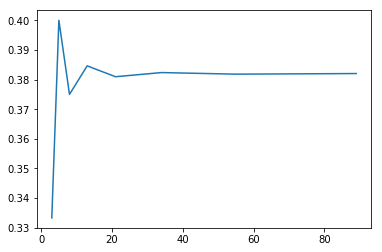

In [30]:
# a polynomial fit of Fibonacci numbers
import math
import numpy as np
import matplotlib.pyplot as plt

def fib(n): # nth fibonacci
    if n <= 2:
        return 1
    f0 = 1
    f1 = 1
    for k in range(3,n+1):
        f2 = f0 + f1
        f0 = f1
        f1 = f2
    return f2

def pfitfib(n): # fit a polynomial to Fibonaccis up to n-1 to estimate nth
    x = range(1,n)
    y = [fib(k) for k in x]
    return np.polyfit(x, y, n-2)

def evalpfit(n): # evaluate polynomial fit
    pfit = pfitfib(n)
    psum = 0.
    k = n-2
    for a in pfit:
        psum += n ** k * a
        k -= 1
    return psum

def limeff(n): # limit of |estd Fn - Fn| / Fn
    f = fib(n)
    return abs(evalpfit(n) - f) / f

if __name__=="__main__":
    #print limeff(12)
    x = [fib(n) for n in range(4,12)]
    y = [limeff(n) for n in range(4,12)]
    _ = plt.plot(x, y, '-')
    plt.show()

In [11]:
# average areas of squares
import math
import random

def area(l,w,d): # area with variation
    return random.uniform(l,l+d) * random.uniform(w,w+d)

if __name__=="__main__":
    asum = 0.
    ntrials = 10000
    for i in range(ntrials):
        asum += area(1., 1., 0.1)
    print asum/ntrials

1.10188277551


In [45]:
# minimum lcm(a,b,c,d) with a+b+c+d=1000
import fractions
import functools
import itertools
import operator

def is_prime(n):
    for i in range(3, n):
        if n % i == 0:
            return False
    return True

def prime_generator(n):
    """
    Sieve of Eratosthenes
    Create a candidate list within which non-primes will be
    marked as None.
    """    
    cand = [i for i in range(3, n + 1, 2)]
    end = int(n ** 0.5) // 2
    # Loop over candidates (cand), marking out each multiple.
    for i in range(end):
        if cand[i]:
            cand[cand[i] + i::cand[i]] = [None] * (
                (n // cand[i]) - (n // (2 * cand[i])) - 1)
    # Filter out non-primes and return the list.
    return [2] + [i for i in cand if i]

primes_list = prime_generator(1000)

def factorize(n):
    prime_multiples = []
    for item in primes_list:
        if item > n:
            break
        else:
            while n > 1:
                if n % item == 0:
                    n //= item
                    prime_multiples.append(item)
                else:
                    break
    return prime_multiples

def calculate_divisors(n):
    prime_multiples_list = factorize(n)
    """
    construct unique combinations
    A, B, B, C --> A, B, C, AB, AC, BB, BC, ABC, ABB, BBC
    """
    unique_combinations = set()
    for i in range(1, len(prime_multiples_list)):
        unique_combinations.update(
            set(itertools.combinations(prime_multiples_list, i)))
    # multiply elements of each unique combination
    combination_product = list(functools.reduce(operator.mul, i)
                               for i in unique_combinations)
    combination_product.sort()
    return combination_product

def lcm(a,b):
    return abs(a * b) / fractions.gcd(a,b) if a and b else 0

def lcmarr(arr):
    lcm = arr[0]
    for i in arr[1:]:
        lcm = lcm*i / fractions.gcd(lcm, i) if lcm and i else 0
    return lcm

# function to find GCD of pair with max GCD in the array
def findMaxGCD(arr, n) :
    # Calculating MAX in array
    high = 0
    for i in range(0, n) :
        high = max(high, arr[i])
 
    # Maintaining count array
    count = [0] * (high + 1)
    for i in range(0, n) :
        count[arr[i]] = 1
 
    # Variable to store multiples of a number
    counter = 0
 
    # Iterating from MAX to 1 GCD is always between MAX and 1
    # The first GCD found will be the highest as we are decrementing the potential GCD
    for i in range(high, 0, -1) :
        j = i
 
        # Iterating from current potential GCD till it is less than MAX
        while (j <= high) :
 
            # A multiple found
            if (count[j] == 1) :
                counter = counter + 1       
 
            # Incrementing potential GCD by itself to check i, 2i, 3i....
            j = j + i
 
            # 2 multiples found, max GCD found
            if (counter == 2) :
                return i

if __name__=="__main__":
    # Array in which pair with max GCD is to be found
    #arr = [ 1, 2, 4, 8, 8, 12 ]
    # Size of array
    #n = len(arr)
    #print(findMaxGCD(arr, n))
    
    # choose a,b,c from primes_list, d=1000-a-b-c
    lp = len(primes_list)
    minlcm = 1000
    for a in range(1, 990):
        #a = primes_list[i]
        #b = primes_list[i+1]
        #c = primes_list[i+2]
        for b in range(a+1,900):
            for c in range(b+1,900):
                d = 1000 - a - b - c
                lcma = [a,b,c,d]
                thislcm = lcmarr(lcma)
                if thislcm < minlcm and thislcm > 0:
                    print('a: {0} b: {1} c: {2} d: {3} : lcm: {4}'.format(a,b,c,d,thislcm))
                    #print('lcm a,b: {0}'.format(lcm(a,b)))
                    minlcm = thislcm

a: 1 b: 3 c: 6 d: 990 : lcm: 990
a: 1 b: 3 c: 12 d: 984 : lcm: 984
a: 1 b: 3 c: 249 d: 747 : lcm: 747
a: 1 b: 3 c: 498 d: 498 : lcm: 498
a: 1 b: 9 c: 495 d: 495 : lcm: 495
a: 1 b: 27 c: 486 d: 486 : lcm: 486
a: 1 b: 37 c: 481 d: 481 : lcm: 481
a: 1 b: 111 c: 444 d: 444 : lcm: 444
a: 6 b: 142 c: 426 d: 426 : lcm: 426
a: 20 b: 140 c: 420 d: 420 : lcm: 420


In [26]:
# gcd of 2^72-1, 3^72-1,...
import fractions

def gcdpow(k): # gcd of powers 2^k-1, 3^k-1,...
    onegcd = fractions.gcd(2 ** k - 1, 3 ** k - 1)
    for p in range(4, k+1):
        a = p ** k - 1
        onegcd = fractions.gcd(onegcd, a)
    return onegcd

if __name__=="__main__":
    print gcdpow(72)

73


In [15]:
# non-0 digits of large factorials
import math

def no25(a): # return a list of all factorials of a less multiples of 2 and 5
    if a > 3000:
        return -1
    retlst = []
    while (a>0):
        if a % 2 != 0 and a % 5 != 0:
            retlst.append(a)
        a -= 1
    return retlst

if __name__=="__main__":
    k = 11
    f = 4
    #print math.factorial(k-1) % f
    #print k % f
    #print math.factorial(k-1) % f
    print no25(2017)

[2017, 2013, 2011, 2009, 2007, 2003, 2001, 1999, 1997, 1993, 1991, 1989, 1987, 1983, 1981, 1979, 1977, 1973, 1971, 1969, 1967, 1963, 1961, 1959, 1957, 1953, 1951, 1949, 1947, 1943, 1941, 1939, 1937, 1933, 1931, 1929, 1927, 1923, 1921, 1919, 1917, 1913, 1911, 1909, 1907, 1903, 1901, 1899, 1897, 1893, 1891, 1889, 1887, 1883, 1881, 1879, 1877, 1873, 1871, 1869, 1867, 1863, 1861, 1859, 1857, 1853, 1851, 1849, 1847, 1843, 1841, 1839, 1837, 1833, 1831, 1829, 1827, 1823, 1821, 1819, 1817, 1813, 1811, 1809, 1807, 1803, 1801, 1799, 1797, 1793, 1791, 1789, 1787, 1783, 1781, 1779, 1777, 1773, 1771, 1769, 1767, 1763, 1761, 1759, 1757, 1753, 1751, 1749, 1747, 1743, 1741, 1739, 1737, 1733, 1731, 1729, 1727, 1723, 1721, 1719, 1717, 1713, 1711, 1709, 1707, 1703, 1701, 1699, 1697, 1693, 1691, 1689, 1687, 1683, 1681, 1679, 1677, 1673, 1671, 1669, 1667, 1663, 1661, 1659, 1657, 1653, 1651, 1649, 1647, 1643, 1641, 1639, 1637, 1633, 1631, 1629, 1627, 1623, 1621, 1619, 1617, 1613, 1611, 1609, 1607, 1603, 160

In [19]:
# odd sum of factors
def get_divisors(num):
    return [i for i in range(1, num+1) if num % i == 0]

def sum_divisors(num):
    return sum(get_divisors(num))

if __name__=="__main__":
    ns = 2.46398467273
    for n in range(250000, 300000):
        ls = sum_divisors(n)
        if ls % 2 == 1:
            #print('{0} -> {1}'.format(n, ls))
            ns += 1. / float(n)
    print ns

2.4642842949


In [1]:
# solving factorials
import math

def sfact(a, b, c): # a!+b!+c!
    return math.factorial(a) + math.factorial(b) + math.factorial(c)

def fstirl(a): # Stirling approx
    return math.sqrt(2. * math.pi * a) * (a / math.e)**a

def dapprox(a): # Stirling approx inv
    r = 1.+16.*math.log(a**1.6/2./math.pi)
    return (1. + math.sqrt(r)) / 2.

if __name__=="__main__":
    for a in range(3,6):
        #af = math.factorial(a)
        #print('{0} : {1} : {2}'.format(a, af, dapprox(af)))
        for b in range(1,5):
            for c in range(1,5):
                d = sfact(a, b, c)
                #print dapprox(d)
                dinv = dapprox(d)
                print('{0} -> {1} : {2} -- {3}'.format(d, dinv, math.factorial(int(dinv)), d - math.factorial(int(dinv))))

8 -> 2.99136862008 : 2 -- 6
9 -> 3.13831935696 : 6 -- 3
13 -> 3.55191212556 : 6 -- 7
31 -> 4.35694306972 : 24 -- 7
9 -> 3.13831935696 : 6 -- 3
10 -> 3.26315694985 : 6 -- 4
14 -> 3.62865124996 : 6 -- 8
32 -> 4.3831947559 : 24 -- 8
13 -> 3.55191212556 : 6 -- 7
14 -> 3.62865124996 : 6 -- 8
18 -> 3.87592520428 : 6 -- 12
36 -> 4.47907186923 : 24 -- 12
31 -> 4.35694306972 : 24 -- 7
32 -> 4.3831947559 : 24 -- 8
36 -> 4.47907186923 : 24 -- 12
54 -> 4.79278343646 : 24 -- 30
26 -> 4.20814098676 : 24 -- 2
27 -> 4.24056782812 : 24 -- 3
31 -> 4.35694306972 : 24 -- 7
49 -> 4.71973241359 : 24 -- 25
27 -> 4.24056782812 : 24 -- 3
28 -> 4.2715514844 : 24 -- 4
32 -> 4.3831947559 : 24 -- 8
50 -> 4.73502526192 : 24 -- 26
31 -> 4.35694306972 : 24 -- 7
32 -> 4.3831947559 : 24 -- 8
36 -> 4.47907186923 : 24 -- 12
54 -> 4.79278343646 : 24 -- 30
49 -> 4.71973241359 : 24 -- 25
50 -> 4.73502526192 : 24 -- 26
54 -> 4.79278343646 : 24 -- 30
72 -> 5.00212781872 : 120 -- -48
122 -> 5.36253292232 : 120 -- 2
123 -> 5.36

In [27]:
# solving factorials
import math

def nonzf(a): # last non-0 digit of factorial
    facts = str(math.factorial(a))
    zpos = facts.rfind("0")
    rpos = len(facts) - 1
    while rpos > 0:
        if facts[rpos] != "0":
            return facts[rpos]
        rpos -= 1
    return facts[rpos]

if __name__=="__main__":
    #print nonzf(10)
    res = []
    for i in range(1,100):
        res.append(nonzf(i))
    print res

['1', '2', '6', '4', '2', '2', '4', '2', '8', '8', '8', '6', '8', '2', '8', '8', '6', '8', '2', '4', '4', '8', '4', '6', '4', '4', '8', '4', '6', '8', '8', '6', '8', '2', '2', '2', '4', '2', '8', '2', '2', '4', '2', '8', '6', '6', '2', '6', '4', '2', '2', '4', '2', '8', '4', '4', '8', '4', '6', '6', '6', '2', '6', '4', '6', '6', '2', '6', '4', '8', '8', '6', '8', '2', '4', '4', '8', '4', '6', '8', '8', '6', '8', '2', '2', '2', '4', '2', '8', '2', '2', '4', '2', '8', '6', '6', '2', '6', '4']


In [1]:
def lookandsay(number):
    result = ""

    repeat = number[0]
    number = number[1:]+" "
    times = 1

    for actual in number:
        if actual != repeat:
            result += str(times)+repeat
            times = 1
            repeat = actual
        else:
            times += 1

    return result

num = "1"

for i in range(10):
    print num
    num = lookandsay(num)

1
11
21
1211
111221
312211
13112221
1113213211
31131211131221
13211311123113112211


In [ ]:
def decToBinary(num):
    ret = "";
    while(num > 0):
        ret = str(num % 2) + ret;
        num = int(num / 2);
    return int(ret);

def binaryLookAndSay(pSeq):
    seq = "";
    counter = 0;
    while(counter < len(pSeq)):
        n = 0;
        m = pSeq[counter];
        while(counter < len(pSeq) and pSeq[counter] == m):
            n += 1;
            counter += 1;
        seq += str(decToBinary(n));
        seq += str(m);
    return seq;

def f(seq):
    counter = 0;
    for i in range(0, len(seq) - 2):
        if(seq[i] + seq[i+1] + seq[i+2] == "100"):
            counter += 1;
    return counter;

sequence = "1";
prev = 0;
for i in range(0, 100):
    prev = f(sequence);
    sequence = binaryLookAndSay(sequence);
    if(prev != 0):
        print(f(sequence) / prev);
    else:
        print("0");

0
0
0
0
0
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [27]:
# buying stuff
import math
import random

def spend(l): # spending random amt
    return random.uniform(0,l)

def iprice(l): # item price
    return random.uniform(0,l)

def spdbud(a,b): # spend budget
    res = 0
    s = iprice(a)
    while b > 0.:
        #s = spend(a)
        if s > b or b < 0.00000001:
            return res
        b -= s
        res += s
    return res

if __name__=="__main__":
    #print spdbud(60., 60.)
    rsum = 0.
    l = 100000
    for i in range(l):
        rsum += spdbud(60., 60.)
    print rsum / float(l)

49.3586821241


In [3]:
# prime of form n^5-1?
import fractions
import functools
import itertools
import operator

def is_prime(n):
    for i in range(3, n):
        if n % i == 0:
            return False
    return True

def n5(n):
    return n ** 5

if __name__=="__main__":
    for p in range(1,50):
        if is_prime(p):
            print ( p + 1. ) ** (1./5.)

1.148698355
1.24573093962
1.31950791077
1.37972966146
1.43096908111
1.51571656651
1.64375182952
1.69521820307
1.78260245797
1.82056420303
1.88817502259
1.97435048583
2.0
2.06993505408
2.11178576497
2.13152551327
2.1689435424


In [15]:
# f(n) = 1-f(n-1)f(n-3)f(n-4)
import math

def fn(n):
    if n<0:
        return 1
    return 1 - fn(n-1)*fn(n-3)*fn(n-4)

def fnl(n):
    retvals = [0,1,0,1,1,1,1]
    if n<0:
        return 1
    return retvals[n % 7]

if __name__=="__main__":
    #for n in range(20):
        #diff = fn(n) - fnl(n)
        #print('n: {0} fn: {1} : {2}'.format(n, fn(n), diff))
    res = 0
    for n in range(2018):
        res += fnl(n)
    print res

1441


In [11]:
# 0^3+1^3+2^3=3^2 - perfect squares and cubes
import math

def nn(k):
    a = (math.sqrt(3.) * math.sqrt(3.*k**4+32.)+3.*k*k) ** (1./3.)
    return a / (18. ** (1./3.)) - 2. * (2./3.) ** (1./3.) / a - 1.

if __name__=="__main__":
    for k in range(0,2000):
        n = nn(k)
        if abs(n-math.floor(n)) < 0.01:
            print n
        #print('n: {0} fn: {1} : {2}'.format(n, fn(n), diff))

-1.0
0.0
23.0
25.0026269926
27.0035396265
29.0055504172
34.0041695697
40.0010571251
64.0052321523
65.0040038377
68.002520034
80.0060955535
82.003886476
94.0014895557
96.0050064132
102.00965486
104.009985849


In [34]:
# rolling dice and rerolling the sames
import math
import random
from itertools import groupby

def roll3(rl, n):
    thsrlls = []
    for i in range(n+1):
        thsrlls.append(random.randint(1, 6))
    ctlst = [len(list(group)) for key, group in groupby(thsrlls)]
    ctlst.sort(reverse=True)
    rl += thsrlls
    if ctlst[0] == 1:
        return rl
    if ctlst[0] == 2:
        return roll3(rl, 2)
    if ctlst[0] >= 3:
        return roll3(rl, 3)

if __name__=="__main__":
    #print roll3([], 3)
    #print('n: {0} fn: {1} : {2}'.format(n, fn(n), diff))
    res = 0.
    nlen = 35000000
    for i in range(nlen):
        res += sum(roll3([], 3))
    print res / nlen

20.7389584857


In [12]:
# a square on a cubic curve
import math

def fcub(x, a, b, c): # function
    return x*x*x + a*x*x + b*x + c

def dist(x0, x1, a, b, c): # distance
    return (x1 - x0)**2 + (fcub(x1, a, b, c) - fcub(x0, a, b, c))**2

def dot(x0, x1, x2, a, b, c): # dot product
    return (x1 - x0)*(x2 - x0) + (fcub(x1, a, b, c) + fcub(x0, a, b, c))*(fcub(x2, a, b, c) - fcub(x0, a, b, c))

def triangle(a, b, c):
    x0 = -2.
    xrg = 3.
    err = 0.0002998
    ndiv = 30
    for ix0 in range(ndiv):
        x1 = x0 + 0.01
        for ix1 in range(ndiv):
            x3 = x1 + 0.01
            d1 = dist(x0, x1, a, b, c)
            for ix3 in range(ndiv):
                d3 = dist(x0, x3, a, b, c)
                adist = abs(d3 - d1)
                if adist < err:
                    ddo = dot(x0, x1, x3, a, b, c)
                    #print abs(d3 - d1)
                    if abs(ddo) < err:
                        print('dist: {0} normal: {1}'.format(adist, ddo))
                        return [a, b, c, x0, x1, x3]
                x3 += xrg / ndiv
            x1 += xrg / ndiv
        x0 += xrg / ndiv
    return []

if __name__=="__main__":
    nstps = 20
    pardist = 0.25
    a = 4.0
    for ia in range(nstps):
        b = -2.7
        for ib in range(nstps):
            c = 0.4
            for ic in range(nstps):
                tr = triangle(a, b, c)
                if len(tr) > 0:
                    print('params: {0}'.format(tr))
                c += pardist / nstps
            b += pardist / nstps
        a += pardist / nstps

dist: 0.000273053488 normal: -1.70761919983e-05
params: [4.050000000000001, -2.624999999999999, 0.43750000000000006, 6.38378239159465e-16, 0.4100000000000006, 0.4200000000000006]
dist: 0.00019797786175 normal: -0.000187363511998
params: [4.075000000000001, -2.6374999999999993, 0.43750000000000006, 6.38378239159465e-16, 0.4100000000000006, 0.4200000000000006]
dist: 0.000110915398937 normal: 0.000190547789252
params: [4.112500000000002, -2.6499999999999995, 0.43750000000000006, 6.38378239159465e-16, 0.4100000000000006, 0.4200000000000006]
dist: 3.54305539376e-05 normal: 1.95609067516e-05
params: [4.137500000000002, -2.6624999999999996, 0.43750000000000006, 6.38378239159465e-16, 0.4100000000000006, 0.4200000000000006]
dist: 4.03451035624e-05 normal: -0.000149876175748
params: [4.162500000000002, -2.675, 0.43750000000000006, 6.38378239159465e-16, 0.4100000000000006, 0.4200000000000006]
dist: 0.00026025348175 normal: 0.000295606458002
params: [4.1750000000000025, -2.612499999999999, 0.45000

In [13]:
# a square on a cubic curve 2
import math

def fcub(x, a, b, c): # function
    return x*x*x + a*x*x + b*x + c

def dist(x0, x1, a, b, c): # distance
    return (x1 - x0)**2 + (fcub(x1, a, b, c) - fcub(x0, a, b, c))**2

if __name__=="__main__":
    a = 4.1625
    b = -2.675
    c = 0.4375
    x0 = fcub(0., a, b, c)
    x1 = fcub(0.41, a, b, c)
    print dist(x0, x1, a, b, c)

0.10999554683


In [7]:
# simple divisors
import math

def diva(a): # get divisors
    res = []
    for t in range(1,a+1):
        if a % t == 0:
            res += [t]
    return res

def div(a): # get divisors
    res = []
    for t in range(1,a+1):
        if a % t == 0:
            check = True
            for ot in res:
                if ot != 1 and t % ot == 0:
                    check = False
                    break
            if check:
                res += [t]
    return res

if __name__ == "__main__":
    print diva(81)
    print div(81)

[1, 3, 9, 27, 81]
[1, 3]


In [59]:
# general Fibonacci
import math

def fib(n): # simple fibonacci
    fn1 = 0.
    fn2 = 1.
    for k in range(1,n+1):
        fn = fn1 + fn2
        fn2 = fn1
        fn1 = fn
    return fn

def fibm(n, m): # general fibonacci
    fnm = []
    for k in range(1,m):
        fnm.append(0.)
    fnm.append(1.)
    for k in range(1,n):
        fn = 0.
        for i in range(k,k-m,-1):
            fn += fnm[i]
        fnm.append(fn)
    return fn

if __name__ == "__main__":
    #print fib(8)
    #print fibm(8, 2)
    #print fib(101)/fib(100)
    print fibm(3001, 3000)/fibm(3000, 3000)

2.0


In [80]:
# hypercubes
import math

def hypc2(): # hypercube
    nsteps = 10
    ds = 1.0 / nsteps
    sumd = 0.
    for ix in range(nsteps):
        x = -0.5 + ds * ix
        sumd += math.sqrt(x*x+0.25)
    return sumd / nsteps

def hypc(n): # hypercube
    nsteps = 10
    ds = 1.0 / nsteps
    sumd = 0.
    xvec = [-0.5 for i in range(n)]
    for idim in range(n):
        xvec[idim] = -0.5
        for ix in range(nsteps):
            if idim < n-1:
                xvec[idim] += ds * ix
            sumvec = 0.
            for i in range(n):
                sumvec += xvec[i]**2
            #print xvec
            sumd += math.sqrt(sumvec)
    return 2.**n*sumd / nsteps**(n-1)

if __name__ == "__main__":
    print hypc2()
    print hypc(2)
    print hypc2() / hypc(2)
    print hypc(8)

0.575075887179
22.2933942547
0.0257957976523
0.0148294537994


In [139]:
# rolling dice and rerolling the sames but now over all dice
import math
import random
from itertools import groupby

def roll(tot, n):
    thsrlls = []
    for i in range(n):
        thsrlls.append(random.randint(1, 6))
    thsrlls.sort()
    ctlst = [len(list(group)) for key, group in groupby(thsrlls)]
    ctlst.sort(reverse=True)
    tot += sum(thsrlls)
    if ctlst[0] == 1: # no more multiples
        return tot
    if ctlst[0] == 2:
        return roll(tot, 2)
    if ctlst[0] > 2:
        return roll(tot, 3)

if __name__=="__main__":
    res = 0.
    nlen = 20
    for i in range(nlen):
        res += roll(0, 3)
    print res / (nlen)

14.95


In [133]:
from itertools import groupby

rolls = [1,3,1]
rolls.sort()
ctlst = [len(list(group)) for key, group in groupby(rolls)]
ctlst.sort(reverse=True)
print ctlst
for g in groupby(rolls):
    print g
print random.randint(1, 6)

[2, 1]
(1, <itertools._grouper object at 0x0000000004B0EDD8>)
(3, <itertools._grouper object at 0x0000000004B0EFD0>)
6
